In [1]:
# 타겟 데이터(종속변수) : 1년 뒤 측정한 당뇨병의 진행률
# 특징 데이터(독립변수) : 이 데이터셋의 특징 데이터는 모두 정규화된 값이다.
# Age, Sex, Body mass index, Average blood pressure, S1, S2, S3, S4, S5, S6
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # 추가

diabetes = datasets.load_diabetes() # 당뇨병 데이터셋 로드
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [8]:
cv = KFold(5, shuffle=True, random_state=1) # 추가
print(cross_val_score(lasso, X, y, cv=cv))   # 수정

[0.15826679 0.27107089 0.31454216 0.31624534 0.31669814]


In [9]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]


In [14]:
from sklearn import svm, metrics
# CSV 파일을 읽어 들이고 가공하기 --- (※1)
def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0))) # 라벨(정답) 추출
            vals = list(map(lambda n: int(n) / 256, cols)) # 테스트할 데이터 가공
            images.append(vals)
    return {"labels":labels, "images":images}
data = load_csv("train.csv")
test = load_csv("t10k.csv")
# 학습하기 --- (※2)
clf = svm.SVC()
clf.fit(data["images"], data["labels"])
# 예측하기 --- (※3)
predict = clf.predict(test["images"])
# 결과 확인하기 --- (※4)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


정답률 = 0.7884231536926147
리포트 =
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.81      1.00      0.89        67
           2       0.84      0.69      0.76        55
           3       0.87      0.57      0.68        46
           4       0.76      0.75      0.75        55
           5       0.63      0.80      0.71        50
           6       0.97      0.67      0.79        43
           7       0.74      0.86      0.79        49
           8       0.91      0.72      0.81        40
           9       0.71      0.81      0.76        54

   micro avg       0.79      0.79      0.79       501
   macro avg       0.81      0.78      0.78       501
weighted avg       0.80      0.79      0.79       501



In [15]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
# MNIST 학습 데이터 읽어 들이기 --- (※1)
train_csv = pd.read_csv("train.csv")
test_csv  = pd.read_csv("t10k.csv")
# 필요한 열 추출하기 --- (※2)
train_label = train_csv.iloc[:, 0]
train_data  = train_csv.iloc[:, 1:785]
test_label  = test_csv.iloc[:, 0]
test_data   = test_csv.iloc[:, 1:785]
print("학습 데이터의 수 =", len(train_label))
# 그리드 서치 매개변수 설정 --- (※3)
params = [ {"C":[1,10,100,1000],"kernel":["linear"]},
           {"C":[1,10,100,1000],"kernel":["rbf"],"gamma":[1,10,100,1000]} ] # gamma:커널의 폭, C : 규제매개변수
# 그리드 서치 수행 --- (※4)
svc = svm.SVC()
clf = GridSearchCV(svc, params)
clf.fit(train_data, train_label)
print("학습기 =", clf.best_estimator_)
# 테스트 데이터 확인하기 --- (※5)
pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(pre, test_label)
cl_report = metrics.classification_report(test_label, pre)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

학습 데이터의 수 = 1000


c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


학습기 = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
정답률 = 0.868
리포트 =
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.97      1.00      0.99        67
           2       0.86      0.93      0.89        55
           3       0.84      0.80      0.82        46
           4       0.89      0.89      0.89        55
           5       0.72      0.84      0.78        50
           6       0.95      0.86      0.90        43
           7       0.80      0.83      0.82        48
           8       0.91      0.72      0.81        40
           9       0.84      0.80      0.82        54

   micro avg       0.87      0.87      0.87       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.87  

In [16]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lasso = linear_model.Lasso()
model = lasso.fit(x_train, y_train)
model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
pred = model.predict(x_test)
pred[:10]

array([171.4611269 , 129.44041729, 142.91475743, 146.83385518,
       139.62741191, 152.98736854, 179.49641977, 136.47006229,
       110.62429855, 163.7934063 ])

In [18]:
from sklearn.metrics import mean_squared_error
# 손실의 예상 값에 해당하는 위험 메트릭 인 평균 제곱 오류(MSE) 계산
mean_squared_error(y_test, pred) 

3944.0821439586625

In [19]:
import math
# 평균 제곱 오류(MSE) 편차.RMSE(Root Mean Square Error)
rmse = math.sqrt(mean_squared_error(y_test, pred)) 
rmse

62.80192786816868

In [20]:
from sklearn.metrics import mean_absolute_error
# 평균 절대 오차, l1-norm 손실의 예상 값에 해당하는 위험 척도 계산
mean_absolute_error(y_test, pred) 

51.84074385373616

In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, pred)

0.349840250351669

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.34914195722697006

In [33]:
import csv
with open('basket.csv', 'rt', encoding='UTF8') as cf:
    transactions = [] 
    r = csv.reader(cf)
    for row in r:
         transactions.append(row)
transactions


[['소주', '콜라', '와인'],
 ['소주', '오렌지주스', '콜라'],
 ['콜라', '맥주', '와인'],
 ['소주', '콜라', '맥주'],
 ['오렌지주스', '와인']]

In [35]:
from apyori import apriori
rules = apriori(transactions, min_support=0.1, min_confidence=0.1) 
results = list(rules) 
type(results)

list

In [36]:
results

[RelationRecord(items=frozenset({'맥주'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'맥주'}), confidence=0.4, lift=1.0)]),
 RelationRecord(items=frozenset({'소주'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'소주'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'오렌지주스'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'오렌지주스'}), confidence=0.4, lift=1.0)]),
 RelationRecord(items=frozenset({'와인'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'와인'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'콜라'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'콜라'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'맥주', '소주'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'맥주'}), it

In [37]:
results[0]

RelationRecord(items=frozenset({'맥주'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'맥주'}), confidence=0.4, lift=1.0)])

In [38]:
results[10]

RelationRecord(items=frozenset({'소주', '콜라'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset({'소주'}), items_add=frozenset({'콜라'}), confidence=1.0, lift=1.25), OrderedStatistic(items_base=frozenset({'콜라'}), items_add=frozenset({'소주'}), confidence=0.7499999999999999, lift=1.2499999999999998)])

In [39]:
print("lhs \trhs \t\tsupport\t\tconfidence\tlift")
for row in results:
    support = row[1]
    ordered_stat = row[2]
    for ordered_item in ordered_stat:
        lhs = [x for x in ordered_item[0]]
        rhs = [x for x in ordered_item[1]]
        confidence = ordered_item[2]
        lift = ordered_item[3]
        print(lhs, " => ", rhs, "\t{:>5.4f}\t{:>5.4f}\t{:>5.4f}".\
              format(support, confidence, lift))


lhs 	rhs 		support		confidence	lift
[]  =>  ['맥주'] 	0.4000	0.4000	1.0000
[]  =>  ['소주'] 	0.6000	0.6000	1.0000
[]  =>  ['오렌지주스'] 	0.4000	0.4000	1.0000
[]  =>  ['와인'] 	0.6000	0.6000	1.0000
[]  =>  ['콜라'] 	0.8000	0.8000	1.0000
['맥주']  =>  ['소주'] 	0.2000	0.5000	0.8333
['소주']  =>  ['맥주'] 	0.2000	0.3333	0.8333
['맥주']  =>  ['와인'] 	0.2000	0.5000	0.8333
['와인']  =>  ['맥주'] 	0.2000	0.3333	0.8333
['맥주']  =>  ['콜라'] 	0.4000	1.0000	1.2500
['콜라']  =>  ['맥주'] 	0.4000	0.5000	1.2500
['소주']  =>  ['오렌지주스'] 	0.2000	0.3333	0.8333
['오렌지주스']  =>  ['소주'] 	0.2000	0.5000	0.8333
['소주']  =>  ['와인'] 	0.2000	0.3333	0.5556
['와인']  =>  ['소주'] 	0.2000	0.3333	0.5556
['소주']  =>  ['콜라'] 	0.6000	1.0000	1.2500
['콜라']  =>  ['소주'] 	0.6000	0.7500	1.2500
['오렌지주스']  =>  ['와인'] 	0.2000	0.5000	0.8333
['와인']  =>  ['오렌지주스'] 	0.2000	0.3333	0.8333
['오렌지주스']  =>  ['콜라'] 	0.2000	0.5000	0.6250
['콜라']  =>  ['오렌지주스'] 	0.2000	0.2500	0.6250
['와인']  =>  ['콜라'] 	0.4000	0.6667	0.8333
['콜라']  =>  ['와인'] 	0.4000	0.5000	0.8333
['맥주', '소주']  =>  ['

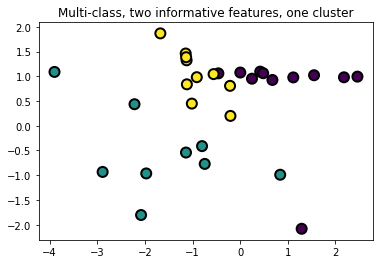

In [40]:
# make_classification함수 - 설정에 따른 분류용 가상 데이터를 생성하는 명령
# 인수
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 
#               디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
# 반환값:
# X : [n_samples, n_features] 크기의 배열. 독립 변수
# y : [n_samples] 크기의 배열. 종속 변수
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
 
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_samples=30, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           n_classes=3, random_state=123) 
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor='k', linewidth=2) # c:y에서 c는 컬러로 각데이터에 대해 y배열(리스트)를 사용
plt.show()

In [41]:
from sklearn.cluster import KMeans
# 모형 생성. 클러스터 = 3
model = KMeans(n_clusters=3, init="random") 
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
model.cluster_centers_ # 각 클러스터의 중심값

array([[ 1.44565173,  0.2610318 ],
       [-0.55984665,  1.04057827],
       [-1.96728067, -0.48772003]])

In [43]:
pred = model.predict(X) # 데이터가 속하는 클러스터 예측
pred

array([0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1])

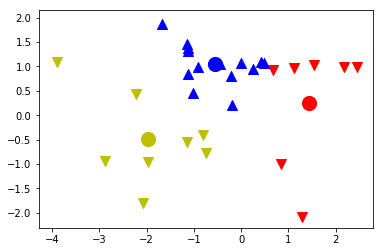

In [44]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], 
            s=100, marker="v", c="r")
plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], 
            s=100,marker="^", c="b")
plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], 
            s=100,marker="v", c="y")
plt.scatter(c0[0], c0[1], s=200, c="r")
plt.scatter(c1[0], c1[1], s=200, c="b")
plt.scatter(c2[0], c2[1], s=200, c="y")
plt.show()

In [45]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.hstack([X,
         np.linalg.norm(X - c0, axis=1)[:, np.newaxis], # 첫번째 클러스터 중심값과의 거리
         np.linalg.norm(X - c1, axis=1)[:, np.newaxis], # 두번째 클러스터 중심값과의 거리
         np.linalg.norm(X - c2, axis=1)[:, np.newaxis], # 세번째 클러스터 중심값과의 거리
         model.labels_[:, np.newaxis]]),
      columns=["x0", "x1", "d0", "d1", "d2", "class"])
df

,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,2.349375,3.631148,3.628258,0.0
1,0.677549,0.926385,1.016207,1.242654,2.999136,0.0
2,0.248341,0.952078,1.382425,0.813018,2.642347,1.0
3,-2.218453,0.436127,3.668286,1.765315,0.957383,2.0
4,-3.898155,1.089007,5.407570,3.338659,2.492858,2.0
5,-2.080478,-1.805009,4.086822,3.226405,1.322144,2.0
6,1.115515,0.977966,0.789294,1.676531,3.413483,0.0
7,-0.203825,0.199599,1.650621,0.913234,1.892666,1.0
8,0.420718,1.095145,1.321451,0.982081,2.864960,1.0
9,-0.457603,1.059832,2.064089,0.104040,2.161954,1.0


In [46]:
def plot_clusters(model, data):
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], X[model.labels_ == 0, 1],
                s=20, marker="v", c="r")
    plt.scatter(data[model.labels_ == 1, 0], X[model.labels_ == 1, 1], 
                s=20, marker="^", c="b")
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], 
            s=20,marker="v", c="y")
    plt.scatter(c0[0], c0[1], s=40, c="r")
    plt.scatter(c1[0], c1[1], s=40, c="b")
    plt.scatter(c2[0], c2[1], s=40, c="y")

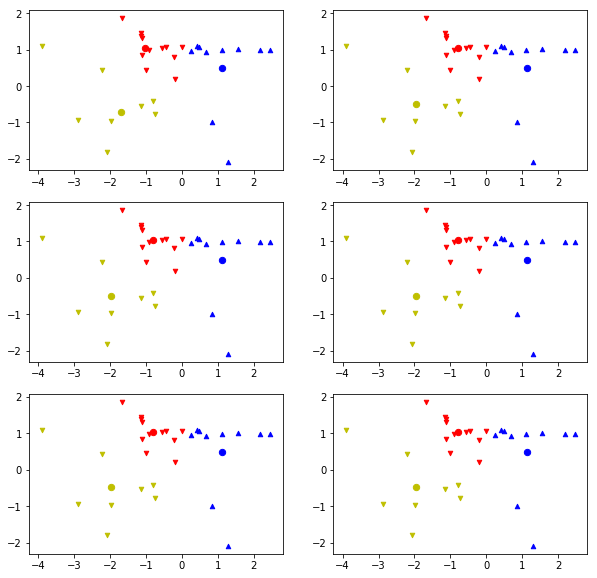

In [47]:
plt.figure(figsize=(10,10))
model1 = KMeans(n_clusters=3, init="random", n_init=1,
                max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(3,2,1)
plot_clusters(model1, X)

model2 = KMeans(n_clusters=3, init="random", n_init=1,
                max_iter=2, random_state=1)
model2.fit(X)
plt.subplot(3,2,2)
plot_clusters(model2, X)

model3 = KMeans(n_clusters=3, init="random", n_init=1,
                max_iter=3, random_state=1)
model3.fit(X)
plt.subplot(3,2,3)
plot_clusters(model3, X)

model4 = KMeans(n_clusters=3, init="random", n_init=1,
                max_iter=4, random_state=1)
model4.fit(X)
plt.subplot(3,2,4)
plot_clusters(model4, X)

model5 = KMeans(n_clusters=3, init="random", n_init=1,
                max_iter=5, random_state=1)
model5.fit(X)
plt.subplot(3,2,5)
plot_clusters(model5, X)

model6 = KMeans(n_clusters=3, init="random", n_init=1,
                max_iter=6, random_state=1)
model6.fit(X)
plt.subplot(3,2,6)
plot_clusters(model6, X)
plt.show()

In [48]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [50]:
# 파이썬으로 계층적 클러스터링을 하려면 SciPy 패키지의 linkage 명령을 사용한다.
# method : 단일 연결법(single linkage), 완전 연결법(complete linkage), 평균 연결법(average linkage)
# 단일 연결법(single linkage) 
# : 두 클러스터에서 가장 가까운 거리를 사용하는 방식
# 완전 연결법(complete linkage) 
# : 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식
# 평균 연결법(average linkage)
# : 각 클러스터내의 각 점에서 다른 클러스터내의 모든 점사이의 거리에 대한 평균을 사용하는 방식
from scipy.cluster.hierarchy import linkage
clustering = linkage(iris_df, method='complete')

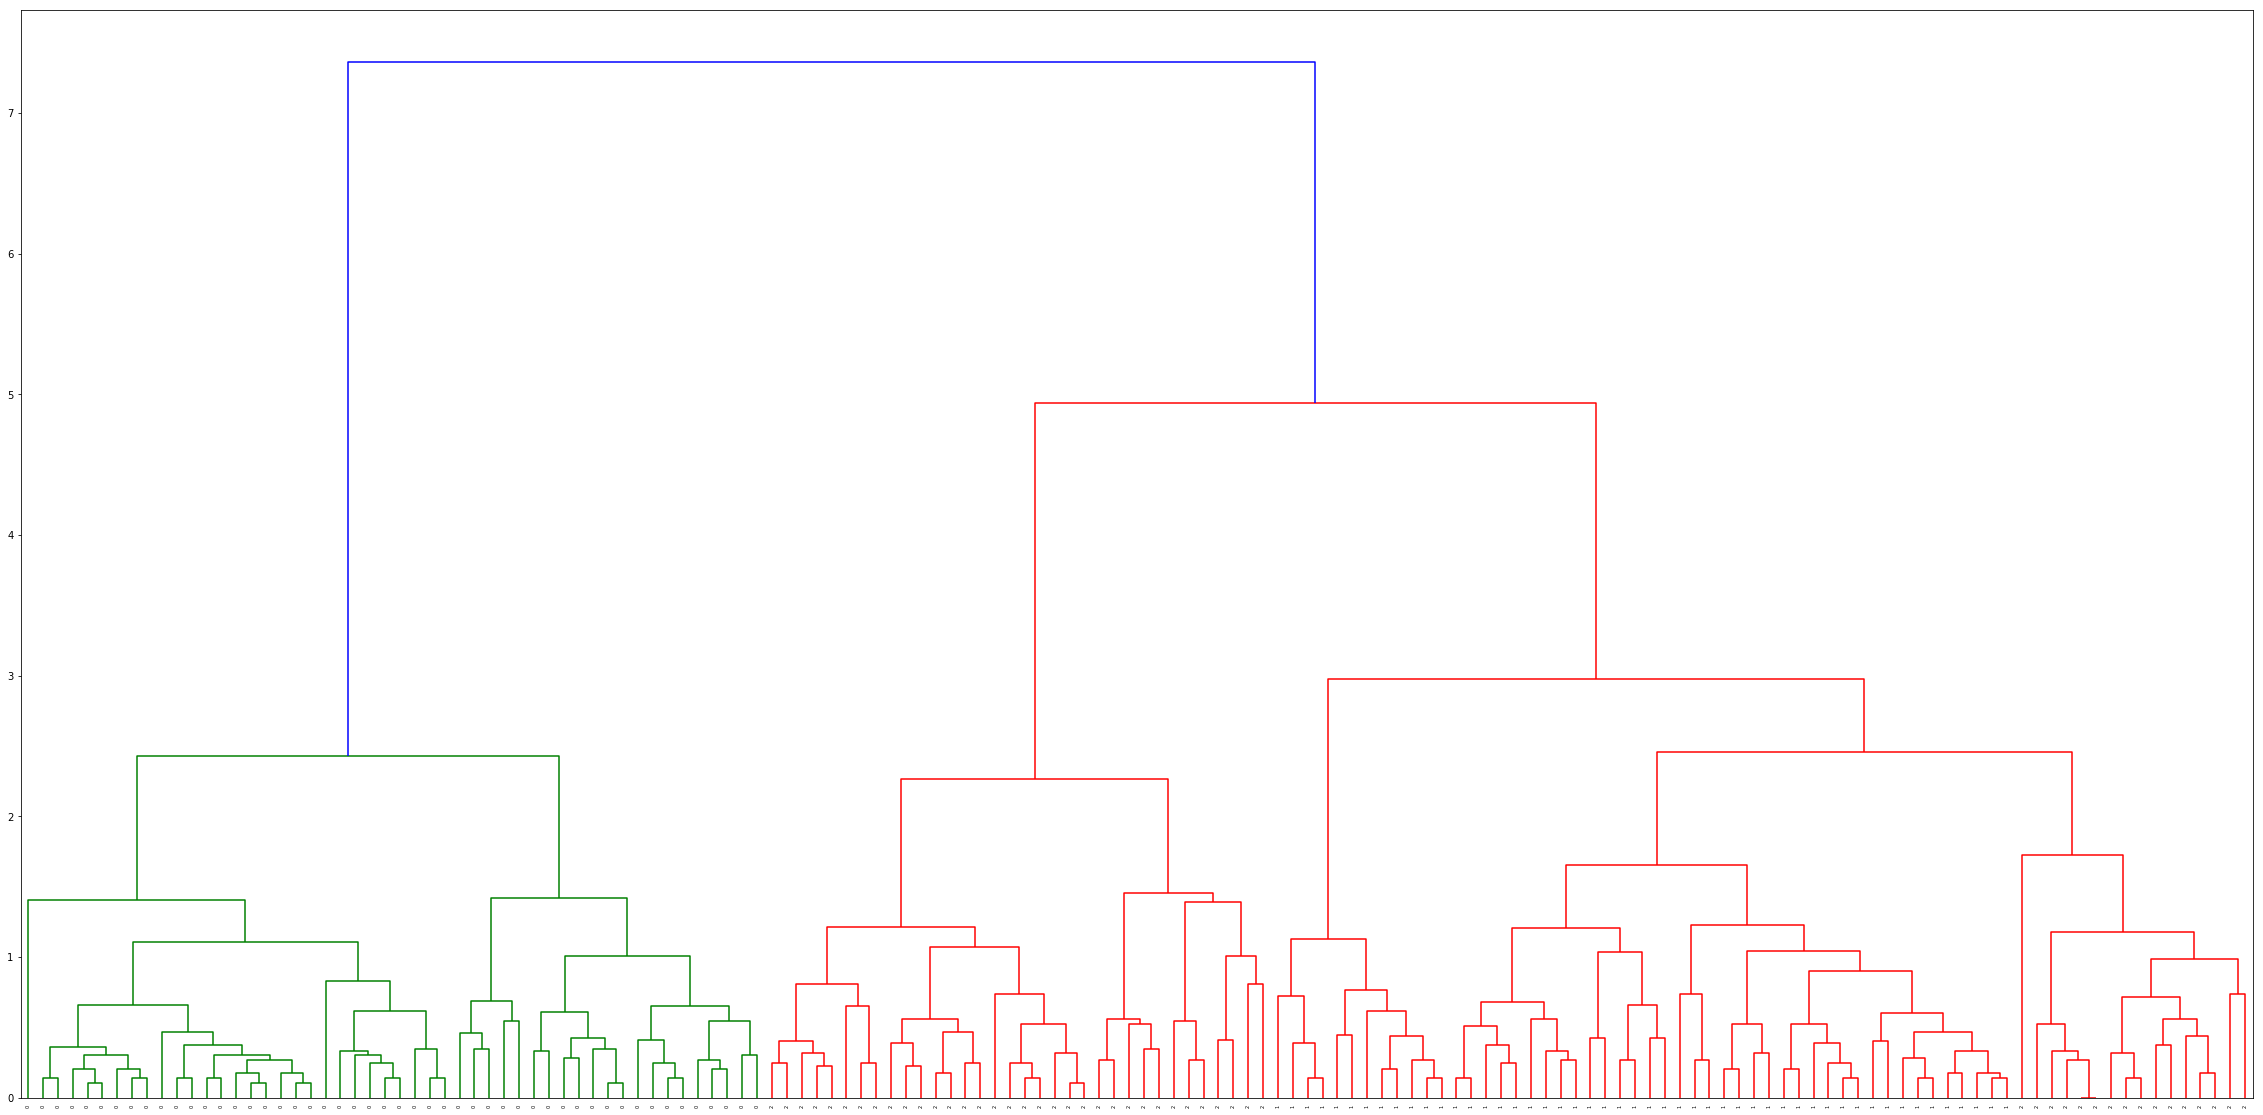

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,20))
from scipy.cluster.hierarchy import dendrogram
dendrogram(clustering, labels = iris_df.Species.values) # labels : 0, 1, 2
plt.show()

In [57]:
from scipy.cluster.hierarchy import fcluster
predict = fcluster(clustering,3, criterion='distance') 
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [60]:
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 2, 1]).astype(np.int64)
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [61]:
import pandas as pd
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris_df.Species.values)
ct = pd.crosstab(origin_name, pred_name,
                 rownames=["True"], colnames=["Predicted"], 
                 margins=True)
print(ct)

Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          50          0   50
virginica        0          16         34   50
All             50          66         34  150


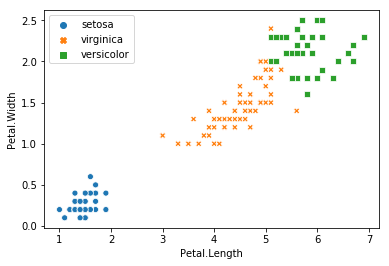

In [62]:
import seaborn as sns
ax = sns.scatterplot(x="Petal.Length", y="Petal.Width", 
                     hue=le.inverse_transform(predict-1), 
                     style=le.inverse_transform(predict-1), 
                     data=iris_df)

In [63]:
# rand_index
# Rand index는 0부터 1까지의 값을 가지고 1이 가장 좋은 성능을 뜻한다. 
# 랜드 인덱스는 모든 클러스터 쌍을 고려하여 예측 된 클러스터링과 
# 실제 클러스터링에서 동일하거나 다른 클러스터에 할당된 쌍을 
# 고려하여 두 클러스터링 간의 유사성 측정 계산

# 클러스터링 성능평가 기준1
# adjusted Rand index:
# Rand index의 기댓값을 원래의 값에서 빼서 기댓값과 분산을 재조정한
# 것이다.

# 정확도에 대한 유사도 측정.
from sklearn.metrics import adjusted_rand_score 
adjusted_rand_score(labels_true=iris_df.Species, labels_pred=predict)

0.7322981167185345

In [64]:
# mutual information 
# 두 확률변수간의 상호 의존성을 측정한 값으로 두 확률변수가 
# 독립적이면 0이며 최소값이다.
# 클러스터의 갯수가 많아질수록 mutual information이 증가하므로 
# 올바른 비교가 어렵다. 

# 클러스터링 성능평가 기준2
# adjusted mutual information
# mutual information 기댓값을 빼서 재조정한 것
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(labels_true=iris_df.Species, 
                labels_pred=predict)

c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7753959316904311

In [65]:
from sklearn.metrics import homogeneity_score
# homogeneity: 각 클러스터가 단일 클래스의 데이터만 가지는 정도
homogeneity_score(labels_true=iris_df.Species, labels_pred=predict)

0.778176865951397

In [66]:
from sklearn.metrics import completeness_score
# completeness: 같은 클래스의 값이 하나의 클러스터로 모여 있는 정도
completeness_score(labels_true=iris_df.Species, labels_pred=predict)

0.8035885406231501

In [67]:
from sklearn.metrics import v_measure_score
# V-measure: homogeneity와 completeness의 조화 평균
v_measure_score(labels_true=iris_df.Species, labels_pred=predict)

0.7906785790830966